# Geo-Sentiment ?

In [1]:
import os
import re
import pandas as pd

In [2]:
df = pd.read_json('http://192.168.1.107/api/twitter/emo/ratio/history')
df.head()

,0,1
0,2018-01,0.147140
1,2017-12,0.121017
2,2017-11,0.112300


As it appears, the "positive" context is consistently dominating with the rate ~10/1. For that reason we have to normalize the weight of "negative" context, as we use runtime for count's proxy.

In [3]:
N = 14 # two weeks

In [4]:
df = pd.read_json('http://192.168.1.107/api/twitter/geo/sent/history/{}'.format(N))
df.head()

,0,1,2
0,Albania,0.223842,2017-12-25
1,Albania,0.047600,2018-01-01
2,Albania,0.059780,2018-01-03
3,Algeria,0.031022,2017-12-24
4,Algeria,0.019931,2017-12-26


In [5]:
df.columns = ['Country','Score','Date']
df.Date = pd.to_datetime(df.Date)
df.head()

,Country,Score,Date
0,Albania,0.223842,2017-12-25
1,Albania,0.047600,2018-01-01
2,Albania,0.059780,2018-01-03
3,Algeria,0.031022,2017-12-24
4,Algeria,0.019931,2017-12-26


In [6]:
geosent = df.groupby(['Country'], axis=0).mean().sort_values('Score', ascending = False)
geosent.head(10)

,Score
Country,
Armenia,0.293899
Albania,0.110407
Isle of Man,0.100344
Estonia,0.076378
Guinea,0.065286
Malta,0.062143
Monaco,0.058563
Macao,0.058119
Macedonia,0.054441


In [7]:
geosent.tail(10)

,Score
Country,
Barbados,0.004354
Namibia,0.003955
Luxembourg,0.003698
Malawi,0.001875
Yemen,0.000690
Réunion,0.000245
Antigua and Barbuda,-0.004501
Lesotho,-0.005787
Bermuda,-0.010473


In [8]:
countries = df.groupby(['Country']).size().reset_index(name='count')
countries = countries[countries['count'] == N] # consistent presence
countries = countries['Country'].tolist()
len(countries)

79

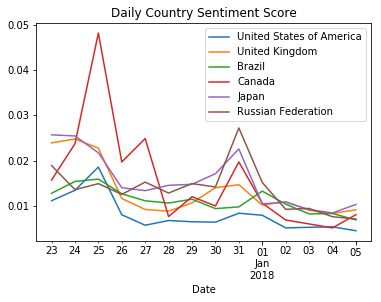

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
for name in ['United States of America','United Kingdom','Brazil','Canada','Japan','Russian Federation']:
    df[df['Country'] == name].plot( ax = ax, kind = 'line', x = 'Date', y = 'Score', label = name)
plt.title('Daily Country Sentiment Score')
plt.show()

In [10]:
df = pd.read_json('http://192.168.1.107/api/twitter/emo/rate/history/{}'.format(N))
df.columns = ['Description','Country','Rate','Date']
df.Date = pd.to_datetime(df.Date)
df.head()

,Description,Country,Rate,Date
0,face with tears of joy,Andorra,0.007775,2017-12-24
1,wrapped gift,Andorra,0.007230,2017-12-25
2,christmas tree,Andorra,0.008338,2017-12-26
3,santa claus,Andorra,0.008338,2017-12-26
4,registered,Andorra,0.008338,2017-12-26


In [11]:
import urllib, json

response = urllib.request.urlopen('http://192.168.1.107/api/twitter/emo')
data = json.loads(response.read().decode())
lookup = {}
for d in data: lookup[data[d]] = chr(int(d))

In [12]:
emo = df.groupby(['Description','Country']).size().reset_index(name='count')
emo = emo[emo['count'] == N]
emo = emo.groupby(['Description']).size().reset_index(name='count')\
            .sort_values('count', ascending = False)
emo['emo'] = emo['Description'].apply(lambda x: lookup[x])
emo.head(10)

,Description,count,emo
55,face with tears of joy,40,😂
126,red heart,25,❤
145,smiling face with heart-eyes,19,😍
93,loudly crying face,16,😭
147,smiling face with smiling eyes,14,😊
21,broken heart,11,💔
48,face blowing a kiss,11,😘
59,female sign,9,♀
23,clapping hands,9,👏
104,ok hand,9,👌


In [13]:
top5 = emo['Description'].tolist()[:5]
top5

['face with tears of joy',
 'red heart',
 'smiling face with heart-eyes',
 'loudly crying face',
 'smiling face with smiling eyes']

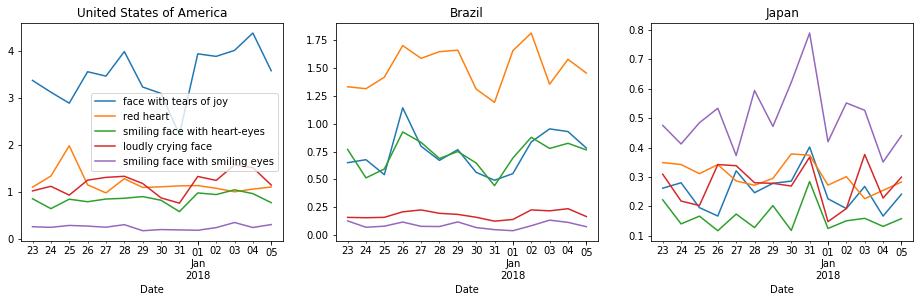

In [14]:
plt.rcParams['figure.figsize'] = (16, 4)

fig, ax = plt.subplots(nrows = 1, ncols = 3)
ax = ax.flatten()

countries = ['United States of America','Brazil','Japan']

for i in range(len(countries)):
    ax[i].set_title(countries[i])
    
for d in top5:
    for i in range(len(countries)):
        df[(df['Country'] == countries[i]) & (df['Description'] == d)]\
                .plot( ax = ax[i], kind = 'line', x = 'Date', y = 'Rate', label = d)
        if i > 0:
            ax[i].legend_.remove()
plt.show()